In [43]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np

In [27]:
base_url = "https://api.census.gov/data/2017/acs/acs1/profile"
variables = "DP04_0089E,LSAD_NAME"
county_num = "001"
state_num = "06"
query_url = f"{base_url}?get={variables}&for=county:{county_num}&in=state:{state_num}"
print(query_url)

med_home_value = requests.get(query_url).json()
print(med_home_value)
print(f"Median Home Value for {med_home_value[1][1]}: {med_home_value[1][0]} dollars")

https://api.census.gov/data/2017/acs/acs1/profile?get=DP04_0089E,LSAD_NAME&for=county:001&in=state:06
[['DP04_0089E', 'LSAD_NAME', 'state', 'county'], ['781000', 'Alameda County', '06', '001']]
Median Home Value for Alameda County: 781000 dollars


In [24]:
base_url = "https://api.census.gov/data/2017/acs/acs1/profile"
variables = "DP04_0089E,LSAD_NAME"
county_num = "081"
state_num = "06"
query_url = f"{base_url}?get={variables}&for=county:{county_num}&in=state:{state_num}"
print(query_url)

med_home_value = requests.get(query_url).json()
print(med_home_value)
print(f"Median Home Value for {med_home_value[1][1]}: {med_home_value[1][0]} dollars")

https://api.census.gov/data/2017/acs/acs1/profile?get=DP04_0089E,LSAD_NAME&for=county:081&in=state:06
[['DP04_0089E', 'LSAD_NAME', 'state', 'county'], ['1087100', 'San Mateo County', '06', '081']]
Median Home Value for San Mateo County: 1087100 dollars


In [61]:
ca_cty_name = ["San Francisco","Alameda","San Mateo","Contra Costa","Los Angeles","Santa Clara"]
ca_st_fips = ["06","06","06","06","06","06"]
ca_cty_fips = ["075","001","081","013","037","085"]

in_ca_dict = {
    "County Name": ca_cty_name,
    "State_FIPS": ca_st_fips,
    "County_FIPS": ca_cty_fips
}

in_ca_df = pd.DataFrame(in_ca_dict)
in_ca_df

,County Name,State_FIPS,County_FIPS
0,San Francisco,06,075
1,Alameda,06,001
2,San Mateo,06,081
3,Contra Costa,06,013
4,Los Angeles,06,037
5,Santa Clara,06,085


In [62]:
ca_med_home_val = []
med_home_var = "DP04_0089E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_home_val.append(int(med_home_val[1][0]))
    
print(ca_med_home_val)
in_ca_df["Med_Home_Value"] = ca_med_home_val
in_ca_df

[1104100, 781000, 1087100, 642300, 588700, 971300]


,County Name,State_FIPS,County_FIPS,Med_Home_Value
0,San Francisco,06,075,1104100
1,Alameda,06,001,781000
2,San Mateo,06,081,1087100
3,Contra Costa,06,013,642300
4,Los Angeles,06,037,588700
5,Santa Clara,06,085,971300


Text(0,0.5,'Median Home Value ($)')

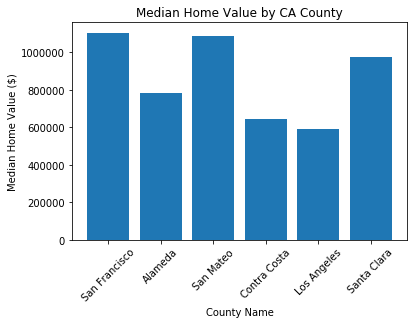

In [63]:
x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_home_val)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Home Value by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")

In [64]:
nonca_cty_name = ["San Francisco","New York County","King County","Multnomah County","Kings County","Cook County"]
nonca_st_fips = ["06","36","53","41","36","17"]
nonca_cty_fips = ["075","061","033","051","047","031"]

non_ca_dict = {
    "County Name": nonca_cty_name,
    "State_FIPS": nonca_st_fips,
    "County_FIPS": nonca_cty_fips
}

non_ca_df = pd.DataFrame(non_ca_dict)
non_ca_df

,County Name,State_FIPS,County_FIPS
0,San Francisco,06,075
1,New York County,36,061
2,King County,53,033
3,Multnomah County,41,051
4,Kings County,36,047
5,Cook County,17,031


In [66]:
non_ca_med_home_val = []
med_home_var = "DP04_0089E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_home_val.append(int(med_home_val[1][0]))
    
print(non_ca_med_home_val)
non_ca_df["Med_Home_Value"] = non_ca_med_home_val
non_ca_df

[1104100, 976100, 563600, 393900, 701800, 247600]


,County Name,State_FIPS,County_FIPS,Med_Home_Value
0,San Francisco,06,075,1104100
1,New York County,36,061,976100
2,King County,53,033,563600
3,Multnomah County,41,051,393900
4,Kings County,36,047,701800
5,Cook County,17,031,247600


Text(0,0.5,'Median Home Value ($)')

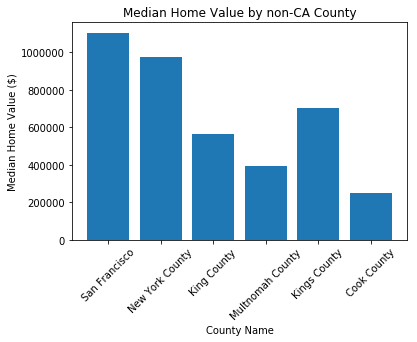

In [67]:
x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_home_val)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Home Value by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")

In [70]:
ca_med_rent = []
med_rent_var = "DP04_0134E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_rent = requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_rent.append(int(med_rent[1][0]))
    
print(ca_med_rent)
in_ca_df["Med_Rent"] = ca_med_rent
in_ca_df

[1836, 1745, 2259, 1766, 1402, 2229]


,County Name,State_FIPS,County_FIPS,Med_Home_Value,Med_Rent
0,San Francisco,06,075,1104100,1836
1,Alameda,06,001,781000,1745
2,San Mateo,06,081,1087100,2259
3,Contra Costa,06,013,642300,1766
4,Los Angeles,06,037,588700,1402
5,Santa Clara,06,085,971300,2229
